# Laboratorio 2 de Dinámica
## Análisis de Datos Experimentales
### Importar paquetes y configurar gráficos

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(color_codes=True)

### Importar datos

In [110]:
subida = pd.read_csv("subida.tsv", sep="\t", decimal=",").fillna(0)
bajada = pd.read_csv("bajada.tsv", sep="\t", decimal=",").fillna(0)
print(subida, bajada)

     Tiempo (s)  Velocidad (m/s)  Fuerza (N)
0          0.00            0.000        4.41
1          0.05            0.000        4.44
2          0.10           -0.022        4.56
3          0.15           -0.023        4.52
4          0.20           -0.028        4.33
..          ...              ...         ...
98         4.90           -0.012        4.62
99         4.95           -0.001        4.57
100        5.00            0.004        4.40
101        5.05            0.006        4.42
102        5.10            0.004        4.47

[103 rows x 3 columns]      Tiempo (s)  Velocidad (m/s)  Fuerza (N)
0          0.00            0.000        4.44
1          0.05            0.000        4.21
2          0.10           -0.031        4.08
3          0.15           -0.060        4.27
4          0.20           -0.081        4.47
..          ...              ...         ...
125        6.25           -0.001        4.51
126        6.30            0.000        4.43
127        6.35           -0.00

### Calcular aceleración numéricamente

In [111]:
subida["Aceleración (m/s²)"] = subida["Velocidad (m/s)"].diff()/subida["Tiempo (s)"].diff()
bajada["Aceleración (m/s²)"] = bajada["Velocidad (m/s)"].diff()/subida["Tiempo (s)"].diff()

### Categorizar y unir

In [112]:
subida["Movimiento"] = ["subida" for i in range(0, len(subida))]
bajada["Movimiento"] = ["bajada" for i in range(0, len(bajada))]
datos = pd.concat([subida, bajada])

### Análisis de valores

In [113]:
print("Acel. máx. subida:", subida["Aceleración (m/s²)"].max())
print("Duración:", round(subida["Tiempo (s)"].max(), 2))
print("Acel. mín. bajada:", round(bajada["Aceleración (m/s²)"].min(), 2))
print("Duración:", round(bajada["Tiempo (s)"].max(), 2))

Acel. máx. subida: 2.64
Duración: 5.1
Acel. mín. bajada: -1.92
Duración: 6.45


In [114]:
indices = []
for indice, velocidad in enumerate(subida["Velocidad (m/s)"]):
    if -0.005 < velocidad < 0.005 and indice >= 3:
        indices.append(indice)
cambios = list(map(lambda i: subida["Tiempo (s)"][i], indices))
print("Cambio de velocidad en la subida a los:", cambios, "s")

indices = []
for indice, velocidad in enumerate(bajada["Velocidad (m/s)"]):
    if -0.005 < velocidad < 0.005 and indice >= 3:
        indices.append(indice)
cambios = list(map(lambda i: bajada["Tiempo (s)"][i], indices))
print("Cambio de velocidad en la bajada a los:", cambios, "s")

Cambio de velocidad en la subida a los: [1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 4.3, 4.35, 4.4, 4.45, 4.5, 4.55, 4.95, 5.0, 5.1] s
Cambio de velocidad en la bajada a los: [0.7, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 4.05, 4.45, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 6.05, 6.1, 6.15, 6.2, 6.25, 6.3, 6.35] s


### Gráfico de scatter

<AxesSubplot:xlabel='Tiempo (s)', ylabel='Fuerza (N)'>

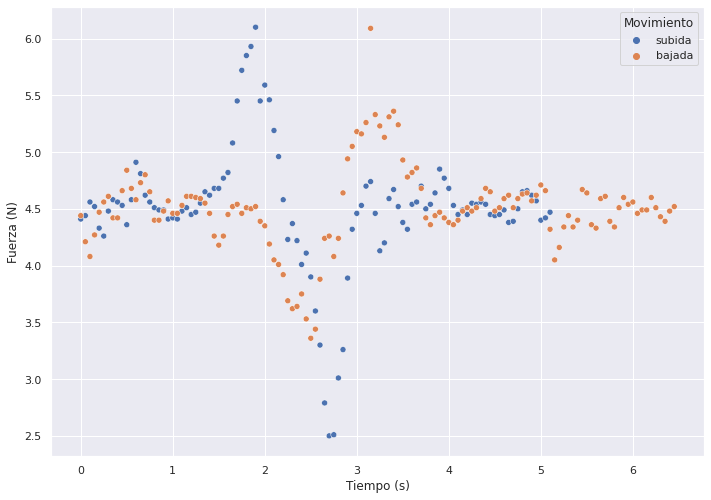

In [115]:
sns.scatterplot(x="Tiempo (s)", y="Fuerza (N)", data=datos, hue="Movimiento")

### Generar gráficos de linea

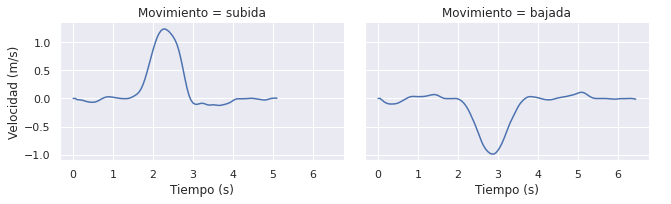

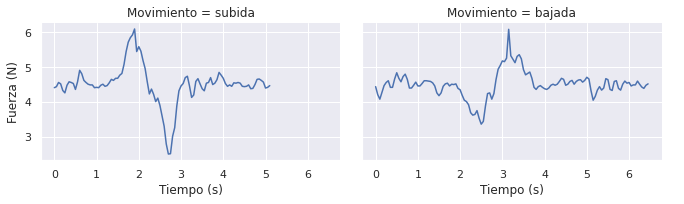

In [116]:
v = sns.FacetGrid(datos, col="Movimiento")
v.map(sns.lineplot, "Tiempo (s)", "Velocidad (m/s)", ci="sd")
v.add_legend()
v.fig.set_figheight(3)
v.fig.set_figwidth(10)
plt.savefig('figs/velocidad.svg', format='svg')

f = sns.FacetGrid(datos, col="Movimiento")
f.map(sns.lineplot, "Tiempo (s)", "Fuerza (N)", ci="sd")
f.add_legend()
f.fig.set_figheight(3)
f.fig.set_figwidth(10)
plt.savefig('figs/fuerza.svg', format='svg')

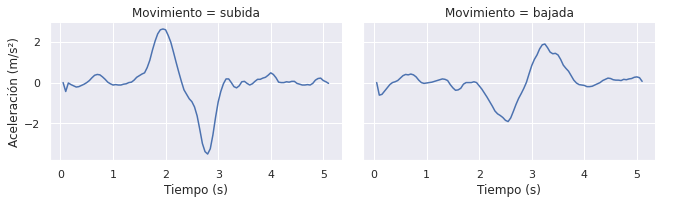

In [117]:
a = sns.FacetGrid(datos, col="Movimiento")
a.map(sns.lineplot, "Tiempo (s)", "Aceleración (m/s²)", ci="sd")
a.add_legend()
a.fig.set_figheight(3)
a.fig.set_figwidth(10)
plt.savefig('acel.svg', format='svg')